# Laporan Dampak Intervensi Pembelajaran

## 1. Ringkasan Eksekutif

Laporan ini bertujuan untuk menganalisis dampak dari intervensi pembelajaran terhadap peningkatan nilai peserta. Data diambil dari 30 peserta yang mengikuti pre-test dan post-test. Beberapa temuan kunci adalah:
1. dengan menggunakan serangkaian uji statistik yg relevan, data menunjukkan program pembelajaran memiliki efek besar terhadap skor peserta. hal tersebut dikonfirmasi oleh uji wilcoxon dan juga cliff delta
2. peserta didominasi oleh perempuan

## 2. Deskripsi Data
- Jumlah Peserta: 30 orang
- Rentang Usia: 18 - 24 tahun

- Jenis Kelamin: Laki-laki dan Perempuan

- Wilayah Domisili: Beragam, dari berbagai provinsi di Indonesia

- Kolom Data:

    - Nama Peserta
    - Domisili

    - Jenis Kelamin

    - Usia

    - Nilai Pre Test

    - Nilai Post Test

## 2. Import dan Eksplorasi Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('/Users/ranggaakhli/Downloads/Untitled spreadsheet - Sheet1.csv')

In [3]:
df.head()

,Nama Peserta,Domisili,Jenis Kelamin,Usia,Nilai Pre Test,Nilai Post Test
0,Haris,Aceh,Laki-laki,19,7.50,8.60
1,Eko,Bali,Laki-laki,20,7.50,8.33
2,Bella,Bali,Perempuan,21,7.57,9.02
3,Dedi,Banten,Laki-laki,18,8.00,8.76
4,Putri,Bengkulu,Perempuan,22,6.33,9.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama Peserta     30 non-null     object 
 1   Domisili         30 non-null     object 
 2   Jenis Kelamin    30 non-null     object 
 3   Usia             30 non-null     int64  
 4   Nilai Pre Test   30 non-null     float64
 5   Nilai Post Test  30 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


data bersih

In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Usia,30.0,20.60,1.77,18.00,19.00,20.50,22.00,24.00
Nilai Pre Test,30.0,7.67,0.70,5.33,7.52,7.67,8.18,8.67
Nilai Post Test,30.0,8.87,0.38,7.89,8.67,8.90,9.05,9.88


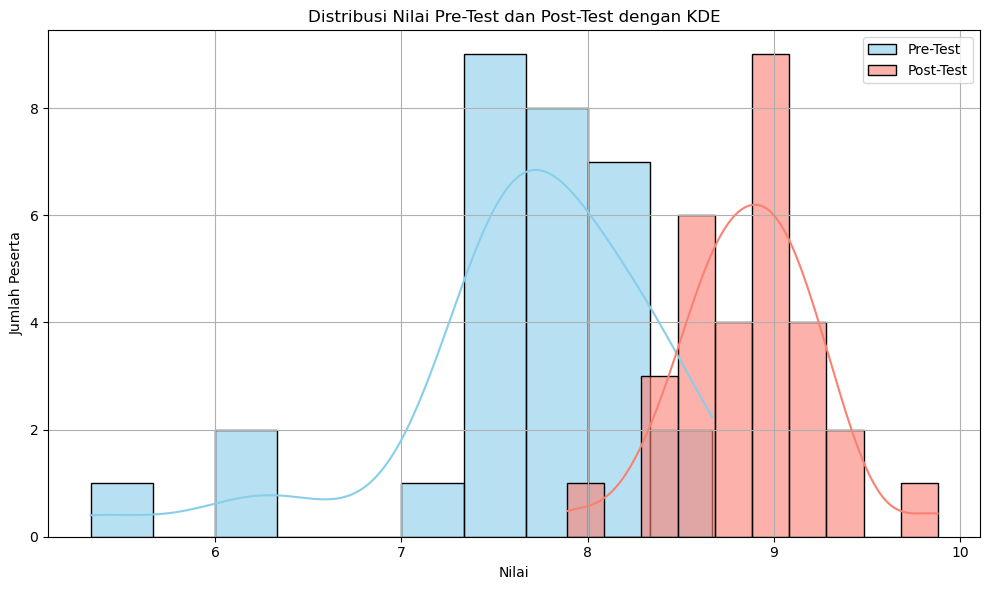

In [6]:
import seaborn as sns

# Plot histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(df["Nilai Pre Test"], bins=10, kde=True, color="skyblue", label="Pre-Test", edgecolor="black", alpha=0.6)
sns.histplot(df["Nilai Post Test"], bins=10, kde=True, color="salmon", label="Post-Test", edgecolor="black", alpha=0.6)
plt.xlabel("Nilai")
plt.ylabel("Jumlah Peserta")
plt.title("Distribusi Nilai Pre-Test dan Post-Test dengan KDE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Temuan dari deskriptif statistik:

1. rentang usia peserta berkisar antara 18 sampai 24 tahun
2. nilai pre test terendah adalah 5.33, tertinggi 8.67 dengan rata-rata 7.67 dengan standar deviasi 0.7
3. rata-rata post test 8.87 dengan median 8.90. artinya rata-rata dan median post test lebih tinggi dari pada pre test. standar deviasinya juga lebih sedikit yakni 0.38. hal ini menunjukkan nilai post test lebih homogen dibanding pre test
4. kesimpulan awalnya: ada peningkatan rata-rata test dari pre ke post test, tapi untuk membuktikan intervensi membuat perbedaan signifikan antara nilai pre dan post, harus diuji dulu secara statistik.
5. tangkapan visualisasi data histogram di atas mengonfirmasi temuan statistik sebelumnya bahwa sebaran nilai post test lebih baik dari pre test

Di bawah ini akan dicari tahu terlebih dahulu normalitas data seperti apa dengan menggunakan uji statistik. 

Ada 3 pilihan, **Shapiro-Wilk, Kolmogorov-Smirnov dan D'Agustino-Pearson**. Dalam kasus ini karena dataset memiliki sample sedikit (30), maka **Shapiro-Wilk** akan dipakai, sebab dua uji lain mengharuskan ukuran sample yang lebih banyak

kita berusaha untuk mengetahui apakah intervensi menyebabkan perubahan atau tidak, oleh karena itu kita buat hitungan dulu yang dinamakan **gain score** atau selisih post dan pre test score, lalu diujikan normalitasnya dari setiap peserta. 

### normality test

In [7]:
#yang perlu dicek sebetulnya gain score, tetapi kita coba cek juga gimana distribusi data dari post dan pre test

from scipy.stats import shapiro
df['Gain Score'] = df['Nilai Post Test'] - df['Nilai Pre Test']

# Uji normalitas Shapiro-Wilk
for kolom in ['Nilai Pre Test', 'Nilai Post Test', 'Gain Score']:
    stat, p = shapiro(df[kolom])
    print(f'Uji normalitas Shapiro-Wilk untuk {kolom}:')
    print(f'  Statistik uji = {stat:.4f}, p-value = {p:.4f}')
    if p > 0.05:
        print('  Data terdistribusi normal\n')
    else:
        print('  Data tidak terdistribusi normal\n')

Uji normalitas Shapiro-Wilk untuk Nilai Pre Test:
  Statistik uji = 0.8385, p-value = 0.0004
  Data tidak terdistribusi normal

Uji normalitas Shapiro-Wilk untuk Nilai Post Test:
  Statistik uji = 0.9697, p-value = 0.5308
  Data terdistribusi normal

Uji normalitas Shapiro-Wilk untuk Gain Score:
  Statistik uji = 0.9095, p-value = 0.0145
  Data tidak terdistribusi normal



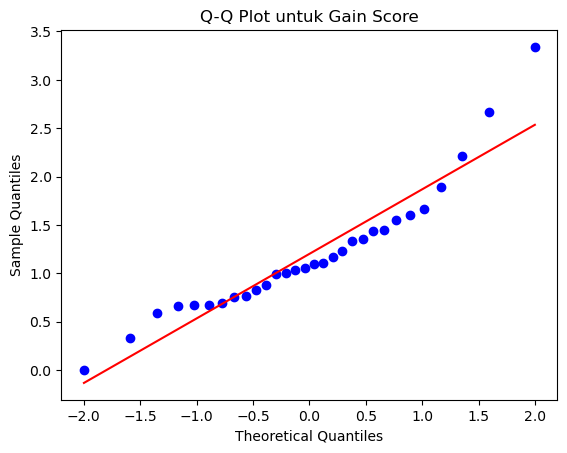

In [8]:
data = df['Gain Score']

# Membuat Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Gain Score')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

ternyata, menurut uji statistik Shapiro-Wilk, data tidak terdistribusi normal, artinya untuk uji statistik selanjutkan, kita akan memakai uji statistik non parametrik. Sementara jika melihat visualisasi dari QQ plot, kita tahu bahwa sebagian data berada di garis lurus diagonal berwarna merah artinya mendekati normal, tapi beberapa titik data berada jauh dari garis diagonal yg menandakan bahaw ada deviasi cukup jauh, mengindikasikan **outlier**

kita akan menggunakan uji **Wilcoxon Signed-Rank Test** daripada **Paired t-Test**

### Uji Signifikansi: Wilcoxon

In [9]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df['Nilai Pre Test'], df['Nilai Post Test'])
print(f'Statistik Wilcoxon: {stat:.4f}, p-value: {p:.4f}')

if p < 0.05:
    print('Terdapat perbedaan signifikan antara Pre Test dan Post Test')
else:
    print('Tidak terdapat perbedaan signifikan antara Pre Test dan Post Test')


Statistik Wilcoxon: 0.0000, p-value: 0.0000
Terdapat perbedaan signifikan antara Pre Test dan Post Test


- Interpretasi Hasil
    - Nilai p-value yang sangat kecil (p < 0.05, bahkan mendekati 0) berarti kita menolak hipotesis nol yang menyatakan tidak ada perbedaan antara Pre Test dan Post Test.
    - Dengan kata lain, pertanyaan awal a**pakah intervensi pembelajaran yang diberikan berhasil memberikan perubahan yang signifikan pada nilai peserta**, jawabannya adalah **ya**.
    - Statistik Wilcoxon = 0 menunjukkan bahwa hampir semua pasangan data mengalami peningkatan (atau perubahan konsisten ke arah tertentu).

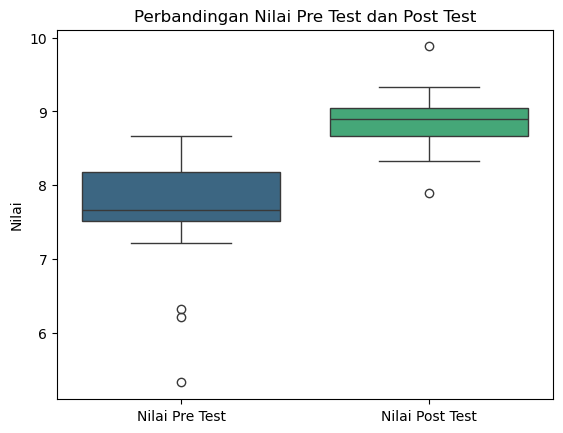

In [10]:
sns.boxplot(data=df[['Nilai Pre Test', 'Nilai Post Test']], palette='viridis')
plt.title('Perbandingan Nilai Pre Test dan Post Test')
plt.ylabel('Nilai')
plt.show()


Visualisasi data boxplot di atas memperjelas perbedaan antara pre test dan post test score tiap peserta. 

### Cliff Delta

**Seberapa besar pengaruh pembelajaran?** kita akan coba hitung dengan menggunakan **Cliff Delta**. jika hasilnya di atas 0.5, artinya kita dapat menginterpretasikan bahwa dampak intervensi pembelajaran adalah besar

In [11]:
import numpy as np

def cliffs_delta(data1, data2):
    """
    Menghitung Cliff's delta untuk dua sampel data.
    """
    n1 = len(data1)
    n2 = len(data2)
    delta = 0
    for i in data1:
        for j in data2:
            if i > j:
                delta += 1
            elif i < j:
                delta -= 1
    return delta / (n1 * n2)


delta = cliffs_delta(df['Nilai Post Test'], df['Nilai Pre Test'])
print(f"Cliff's delta: {delta:.4f}")


Cliff's delta: 0.9467


nilainya 0.9 artinya pengaruh pembelajaran besar. artinya:
1. efek cliff delta mendekati 1 berarti pembelajaran punya efek besar
2. intervensi memiliki dampak praktis yg signifikan, karena sebagian besar peserta menunjukan peningkatan yg substansial
3. program intervensi pembelajaran kemungkinan sangat efektik


## Visualisasi Distribusi Tiap Kolom

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_16896/2154557617.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel')


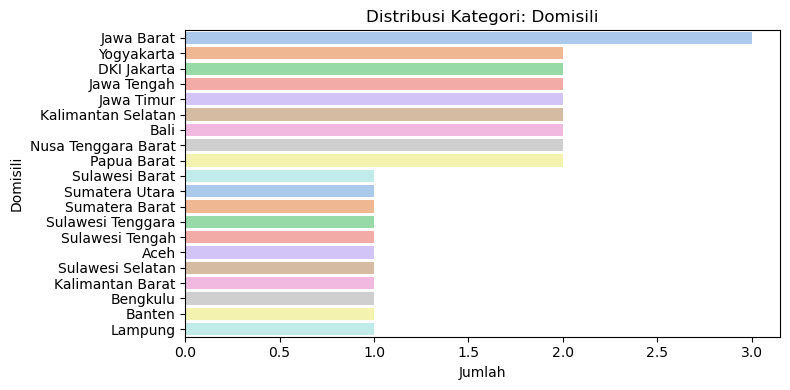

<Figure size 800x400 with 0 Axes>

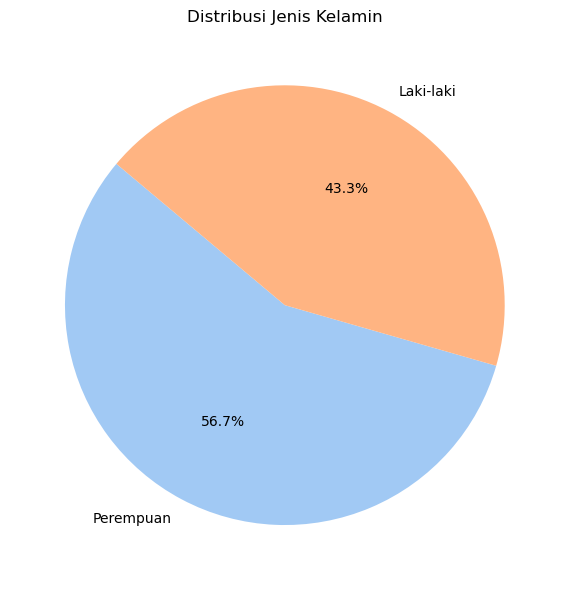

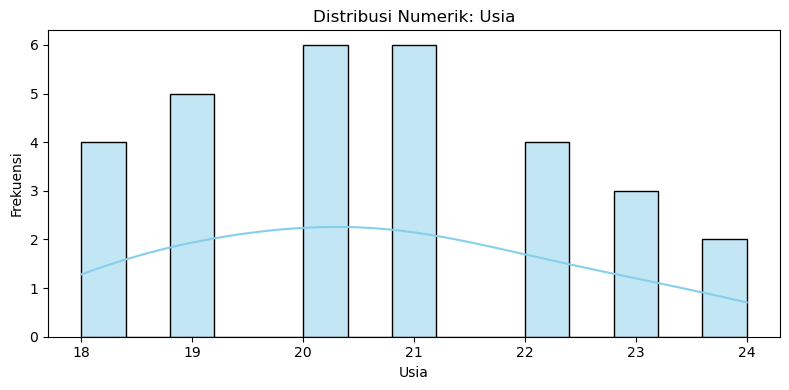

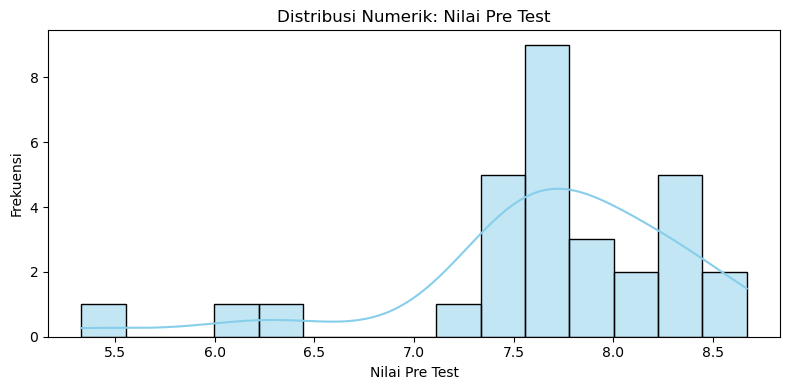

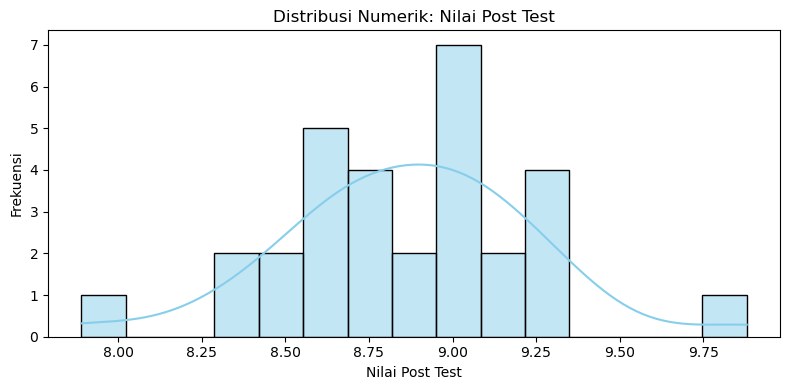

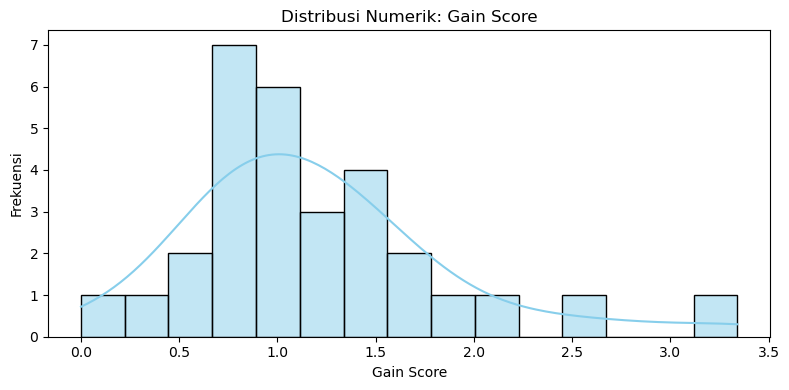

In [12]:
# Daftar kolom yang ingin dianalisis
columns = ['Domisili', 'Jenis Kelamin', 'Usia', 'Nilai Pre Test',
           'Nilai Post Test', 'Gain Score']

# Tentukan kolom mana yang kategorikal dan numerik
# Biasanya kolom string dianggap kategorikal, angka dianggap numerik
categorical_cols = ['Domisili', 'Jenis Kelamin']
numerical_cols = ['Usia', 'Nilai Pre Test', 'Nilai Post Test', 'Gain Score']

# Loop untuk setiap kolom
for col in columns:
    plt.figure(figsize=(8,4))
    
    if col == 'Jenis Kelamin':
        # Plot pie chart untuk Jenis Kelamin
        gender_counts = df['Jenis Kelamin'].value_counts()
        plt.figure(figsize=(6,6))
        plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title('Distribusi Jenis Kelamin')

    elif col in categorical_cols:
        # Plot countplot untuk kolom kategorikal
        sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Distribusi Kategori: {col}')
        plt.ylabel(col)
        plt.xlabel('Jumlah')
        
    elif col in numerical_cols:
        # Plot histogram + KDE untuk kolom numerik
        sns.histplot(df[col].dropna(), bins=15, kde=True, color='skyblue')
        plt.title(f'Distribusi Numerik: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        
    else:
        # Jika kolom tidak terklasifikasi, tampilkan info saja
        print(f"Kolom '{col}' tidak dianalisis (tipe data tidak dikenali).")
        plt.close()
        continue
    
    plt.tight_layout()
    plt.show()


- peserta terbanyak adalah di Jawa Barat
- distribusi peserta berdasarkan jenis kelamin didominasi perempuan dengan 56.7%
- peserta berumur 20 dan 21 adalah peserta dengan frekuensi terbanyak
- distribusi peserta di pre test nampak negatively skewed di mana ekor panjang di sisi kiri, sedangkan distribusi nilai post test bell curved atau terdistribusi normal
- gain score alias selisih antara post dan pre positively-skewed, ada 1 peserta yg mendapatkan peningkatan skor paling singnifikan di atas 3

### Apakah dampak intervensi pembelajaran berbeda secara signifikan antara laki-laki dan perempuan?

In [13]:
import pandas as pd
from scipy import stats

# Data gain score per jenis kelamin
group_laki = df[df['Jenis Kelamin'] == 'Laki-laki']['Gain Score']
group_perempuan = df[df['Jenis Kelamin'] == 'Perempuan']['Gain Score']

# Uji Mann-Whitney U (non-parametrik)
stat, p = stats.mannwhitneyu(group_laki, group_perempuan)
alpha = 0.05

print(f'Uji Mann-Whitney U: statistik = {stat:.4f}, p-value = {p:.4f}')

if p < alpha:
    mean_laki = group_laki.mean()
    mean_perempuan = group_perempuan.mean()
    print('Terdapat perbedaan signifikan dalam perubahan nilai antar jenis kelamin.')
    if mean_laki > mean_perempuan:
        print('  Rata-rata peningkatan laki-laki lebih tinggi.')
    elif mean_perempuan > mean_laki:
        print('  Rata-rata peningkatan perempuan lebih tinggi.')
else:
    print('Tidak ada perbedaan signifikan dalam perubahan nilai antar jenis kelamin.')

Uji Mann-Whitney U: statistik = 116.0000, p-value = 0.8342
Tidak ada perbedaan signifikan dalam perubahan nilai antar jenis kelamin.


Berdasarkan uji Mann-Whitney U, tidak terdapat perbedaan signifikan secara statistik (p = 0.8342) dalam perubahan nilai (gain score) antara kelompok laki-laki dan perempuan.

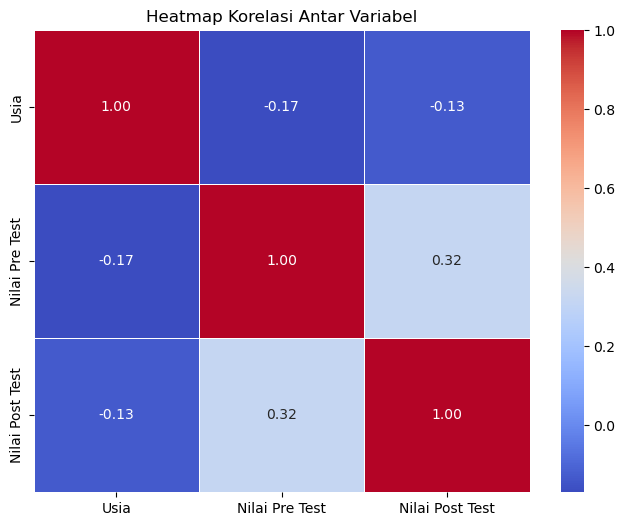

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi Anda sudah memiliki DataFrame 'df'
# dan telah menghitung matriks korelasi seperti sebelumnya
correlation_matrix = df[['Usia', 'Nilai Pre Test', 'Nilai Post Test']].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Dari heatmap ini, dapat disimpulkan bahwa:

- Usia memiliki korelasi yang sangat lemah dengan baik nilai pre-test maupun nilai post-test. Artinya, Usia peserta didik hampir tidak memiliki hubungan linier dengan bagaimana mereka mengerjakan tes sebelum (pre-test) maupun sesudah (post-test) pembelajaran. Ini menyiratkan bahwa usia bukanlah faktor utama yang memengaruhi tingkat pengetahuan awal peserta atau hasil belajar setelah intervensi pembelajaran dalam kelompok ini

- Terdapat korelasi positif yang rendah hingga sedang antara Nilai Pre Test dan Nilai Post Test, menunjukkan bahwa kinerja awal memiliki pengaruh yang moderat terhadap kinerja setelahnya. Artinya: Ada kecenderungan bahwa peserta yang mendapatkan skor lebih tinggi pada pre-test juga cenderung mendapatkan skor lebih tinggi pada post-test. Sebaliknya, peserta dengan skor rendah pada pre-test cenderung mendapatkan skor rendah pada post-test. Namun, korelasinya tidak terlalu kuat (hanya rendah hingga sedang), yang berarti faktor lain selain kinerja awal juga berperan penting dalam menentukan hasil post-test.

Rata-rata Nilai Pre Test Terbaik per Domisili

In [15]:
rata_rata_pre_domisili = df.groupby('Domisili')['Nilai Pre Test'].mean().reset_index()
rata_rata_pre_domisili.rename(columns={'Nilai Pre Test': 'Rata-rata Nilai Pre Test'}, inplace=True)
rata_rata_pre_domisili.sort_values(by='Rata-rata Nilai Pre Test', ascending=False).head(5)

,Domisili,Rata-rata Nilai Pre Test
15,Sulawesi Tengah,8.670
16,Sulawesi Tenggara,8.330
13,Sulawesi Barat,8.330
11,Nusa Tenggara Barat,8.195
12,Papua Barat,8.050


Rata-rata Nilai Post Test Terbaik per Domisili

In [16]:
# Menghitung rata-rata nilai post-test berdasarkan domisili
rata_rata_post_domisili = df.groupby('Domisili')['Nilai Post Test'].mean().reset_index()
rata_rata_post_domisili.rename(columns={'Nilai Post Test': 'Rata-rata Nilai Post Test'}, inplace=True)
rata_rata_post_domisili.sort_values(by='Rata-rata Nilai Post Test', ascending=False).head(5)

,Domisili,Rata-rata Nilai Post Test
9,Kalimantan Selatan,9.575
14,Sulawesi Selatan,9.310
12,Papua Barat,9.165
4,DKI Jakarta,9.155
16,Sulawesi Tenggara,9.000


nilai rata-rata pre test dan post test terbaik per domisili didominasi oleh luar pulau jawa

In [17]:
df.sort_values(by='Gain Score', ascending=False).head()

,Nama Peserta,Domisili,Jenis Kelamin,Usia,Nilai Pre Test,Nilai Post Test,Gain Score
14,Reza,Kalimantan Barat,Laki-laki,21,5.33,8.67,3.34
4,Putri,Bengkulu,Perempuan,22,6.33,9.00,2.67
16,Indah,Kalimantan Selatan,Perempuan,20,7.67,9.88,2.21
10,Satria,Jawa Tengah,Laki-laki,22,7.22,9.11,1.89
28,Budi,Yogyakarta,Laki-laki,21,6.22,7.89,1.67


In [18]:
df.sort_values(by='Nilai Pre Test', ascending=False).head()

,Nama Peserta,Domisili,Jenis Kelamin,Usia,Nilai Pre Test,Nilai Post Test,Gain Score
24,Alvin,Sulawesi Tengah,Laki-laki,22,8.67,8.67,0.00
19,Yuni,Nusa Tenggara Barat,Perempuan,18,8.50,9.19,0.69
23,Vina,Sulawesi Barat,Perempuan,21,8.33,9.00,0.67
21,Tiara,Papua Barat,Perempuan,20,8.33,9.33,1.00
25,Zahra,Sulawesi Tenggara,Perempuan,20,8.33,9.00,0.67


In [19]:
df.sort_values(by='Nilai Post Test', ascending=False).head()

,Nama Peserta,Domisili,Jenis Kelamin,Usia,Nilai Pre Test,Nilai Post Test,Gain Score
16,Indah,Kalimantan Selatan,Perempuan,20,7.67,9.88,2.21
21,Tiara,Papua Barat,Perempuan,20,8.33,9.33,1.00
22,Fajar,Sulawesi Selatan,Laki-laki,19,7.87,9.31,1.44
15,Lita,Kalimantan Selatan,Perempuan,22,7.67,9.27,1.60
6,Tommy,DKI Jakarta,Laki-laki,19,8.26,9.25,0.99
